In [1]:
from google.colab import drive
drive.mount('/content/drive')
print('Authenticated')

Mounted at /content/drive
Authenticated


In [2]:
### be sure to provide the raw link
import pandas as pd
import numpy as np

**Step 1:** import data

In [3]:
df_Volume=pd.read_csv("https://raw.githubusercontent.com/SciEcon/bitcoin_golden_litecoin_silver/main/PU%20ratio%20%26%20Trading/LTC/LTC-USD.csv")
df_Volume.head()

,Date,Open,High,Low,Close,Volume
0,2022/5/31,68.417023,70.076424,62.546368,62.967819,754343388
1,2022/5/30,69.110268,69.562752,67.181343,68.411385,532691935
2,2022/5/29,63.745800,69.296928,63.414074,69.120918,587913790
3,2022/5/28,63.063595,64.265472,62.106644,63.746628,418602793
4,2022/5/27,61.557880,62.686611,61.557880,62.313278,615552947


In [4]:
df_Volume['Date']=pd.to_datetime(df_Volume['Date'])
df_Volume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3078 entries, 0 to 3077
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3078 non-null   datetime64[ns]
 1   Open    3078 non-null   float64       
 2   High    3078 non-null   float64       
 3   Low     3078 non-null   float64       
 4   Close   3078 non-null   float64       
 5   Volume  3078 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 144.4 KB


In [5]:
pd.Timestamp(df_Volume['Date'][0])

Timestamp('2022-05-31 00:00:00')

In [6]:
df_Volume['Date']=df_Volume['Date'].dt.strftime('%Y-%m-%d')

In [7]:
df_Volume.head()

,Date,Open,High,Low,Close,Volume
0,2022-05-31,68.417023,70.076424,62.546368,62.967819,754343388
1,2022-05-30,69.110268,69.562752,67.181343,68.411385,532691935
2,2022-05-29,63.745800,69.296928,63.414074,69.120918,587913790
3,2022-05-28,63.063595,64.265472,62.106644,63.746628,418602793
4,2022-05-27,61.557880,62.686611,61.557880,62.313278,615552947


In [8]:
df_Volume.set_index('Date',drop=True,inplace=True)

In [9]:
df_Volume.index.name=None
df_Volume.head()

,Open,High,Low,Close,Volume
2022-05-31,68.417023,70.076424,62.546368,62.967819,754343388
2022-05-30,69.110268,69.562752,67.181343,68.411385,532691935
2022-05-29,63.745800,69.296928,63.414074,69.120918,587913790
2022-05-28,63.063595,64.265472,62.106644,63.746628,418602793
2022-05-27,61.557880,62.686611,61.557880,62.313278,615552947


In [10]:
df_Volume['Volume']=pd.to_numeric(df_Volume['Volume'])

In [11]:
df_Volume = df_Volume[['Volume']]

In [12]:
###reverse the dataframe: https://www.marsja.se/six-ways-to-reverse-pandas-dataframe/
df_Volume = df_Volume.sort_index(ascending=True)
df_Volume.tail()

,Volume
2022-05-27,615552947
2022-05-28,418602793
2022-05-29,587913790
2022-05-30,532691935
2022-05-31,754343388


In [14]:
df_CM=pd.read_csv("https://raw.githubusercontent.com/SciEcon/bitcoin_golden_litecoin_silver/main/PU%20ratio%20%26%20Trading/LTC/ltc.csv")
df_CM.head()

,time,AdrActCnt,AdrBal1in100KCnt,AdrBal1in100MCnt,AdrBal1in10BCnt,AdrBal1in10KCnt,AdrBal1in10MCnt,AdrBal1in1BCnt,AdrBal1in1KCnt,AdrBal1in1MCnt,...,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,VelCur1yr,VtyDayRet180d,VtyDayRet30d,principal_market_price_usd,principal_market_usd
0,2011-10-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2011-10-08,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2,2011-10-09,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
3,2011-10-10,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
4,2011-10-11,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [15]:
#set "date" column as the index
df_CM.set_index('time', inplace=True)


In [24]:
#to remove the name of the index
df_CM.index.name=None
df_CM=df_CM[df_CM.index<'2022-05-31']
df_CM.tail()

,AdrActCnt,AdrBal1in100KCnt,AdrBal1in100MCnt,AdrBal1in10BCnt,AdrBal1in10KCnt,AdrBal1in10MCnt,AdrBal1in1BCnt,AdrBal1in1KCnt,AdrBal1in1MCnt,AdrBalCnt,...,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,VelCur1yr,VtyDayRet180d,VtyDayRet30d,principal_market_price_usd,principal_market_usd
2022-05-26,389341.0,5277.0,918303.0,2458176.0,745.0,269307.0,1647406.0,154.0,44294.0,5986686.0,...,1.082927e+08,54.890778,3508.744915,0.020993,1.341918,84.950803,0.046092,0.065665,NaN,NaN
2022-05-27,381746.0,5276.0,917515.0,2466172.0,750.0,269657.0,1642287.0,154.0,44327.0,6008588.0,...,8.822864e+07,36.889247,2265.342255,0.034041,2.090446,85.068627,0.046100,0.065437,NaN,NaN
2022-05-28,354418.0,5277.0,918263.0,2471532.0,748.0,269642.0,1635353.0,154.0,44291.0,6030830.0,...,5.727754e+07,76.244307,4804.542256,0.043379,2.733552,84.921858,0.046038,0.065398,NaN,NaN
2022-05-29,341785.0,5272.0,915592.0,2467780.0,751.0,269296.0,1623905.0,154.0,44326.0,6048101.0,...,5.688040e+07,121.469311,7742.537258,0.025056,1.597093,85.424022,0.046047,0.065552,NaN,NaN
2022-05-30,339183.0,5266.0,914165.0,2477988.0,750.0,269225.0,1621078.0,154.0,44383.0,6069108.0,...,1.204556e+08,62.199569,4297.573299,0.043797,3.026051,85.455128,0.046501,0.067541,NaN,NaN


**Step 2: merge two data frame**

In [25]:
###merge two dataframes
##merge two datasets on dates that apply to both

###pd.merge(left, right, how='inner', on=None, left_on=None, right_on=None,
        ### left_index=False, right_index=False, sort=True,
         ###suffixes=('_x', '_y'), copy=True, indicator=False,
         ###validate=None)
df_ltc = pd.merge(df_CM, df_Volume, how='outer', left_index=True, right_index=True)
df_ltc.tail()

,AdrActCnt,AdrBal1in100KCnt,AdrBal1in100MCnt,AdrBal1in10BCnt,AdrBal1in10KCnt,AdrBal1in10MCnt,AdrBal1in1BCnt,AdrBal1in1KCnt,AdrBal1in1MCnt,AdrBalCnt,...,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,VelCur1yr,VtyDayRet180d,VtyDayRet30d,principal_market_price_usd,principal_market_usd,Volume
2022-05-27,381746.0,5276.0,917515.0,2466172.0,750.0,269657.0,1642287.0,154.0,44327.0,6008588.0,...,36.889247,2265.342255,0.034041,2.090446,85.068627,0.046100,0.065437,NaN,NaN,615552947.0
2022-05-28,354418.0,5277.0,918263.0,2471532.0,748.0,269642.0,1635353.0,154.0,44291.0,6030830.0,...,76.244307,4804.542256,0.043379,2.733552,84.921858,0.046038,0.065398,NaN,NaN,418602793.0
2022-05-29,341785.0,5272.0,915592.0,2467780.0,751.0,269296.0,1623905.0,154.0,44326.0,6048101.0,...,121.469311,7742.537258,0.025056,1.597093,85.424022,0.046047,0.065552,NaN,NaN,587913790.0
2022-05-30,339183.0,5266.0,914165.0,2477988.0,750.0,269225.0,1621078.0,154.0,44383.0,6069108.0,...,62.199569,4297.573299,0.043797,3.026051,85.455128,0.046501,0.067541,NaN,NaN,532691935.0
2022-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,754343388.0


In [26]:
df_ltc.tail()

,AdrActCnt,AdrBal1in100KCnt,AdrBal1in100MCnt,AdrBal1in10BCnt,AdrBal1in10KCnt,AdrBal1in10MCnt,AdrBal1in1BCnt,AdrBal1in1KCnt,AdrBal1in1MCnt,AdrBalCnt,...,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,VelCur1yr,VtyDayRet180d,VtyDayRet30d,principal_market_price_usd,principal_market_usd,Volume
2022-05-27,381746.0,5276.0,917515.0,2466172.0,750.0,269657.0,1642287.0,154.0,44327.0,6008588.0,...,36.889247,2265.342255,0.034041,2.090446,85.068627,0.046100,0.065437,NaN,NaN,615552947.0
2022-05-28,354418.0,5277.0,918263.0,2471532.0,748.0,269642.0,1635353.0,154.0,44291.0,6030830.0,...,76.244307,4804.542256,0.043379,2.733552,84.921858,0.046038,0.065398,NaN,NaN,418602793.0
2022-05-29,341785.0,5272.0,915592.0,2467780.0,751.0,269296.0,1623905.0,154.0,44326.0,6048101.0,...,121.469311,7742.537258,0.025056,1.597093,85.424022,0.046047,0.065552,NaN,NaN,587913790.0
2022-05-30,339183.0,5266.0,914165.0,2477988.0,750.0,269225.0,1621078.0,154.0,44383.0,6069108.0,...,62.199569,4297.573299,0.043797,3.026051,85.455128,0.046501,0.067541,NaN,NaN,532691935.0
2022-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,754343388.0


**step 3: visualization**

In [27]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
df_ltc.index=pd.to_datetime(df_ltc.index)

In [28]:
print(plt.style.available)
####Check different styles here: https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [29]:
plt.style.use('seaborn-bright')

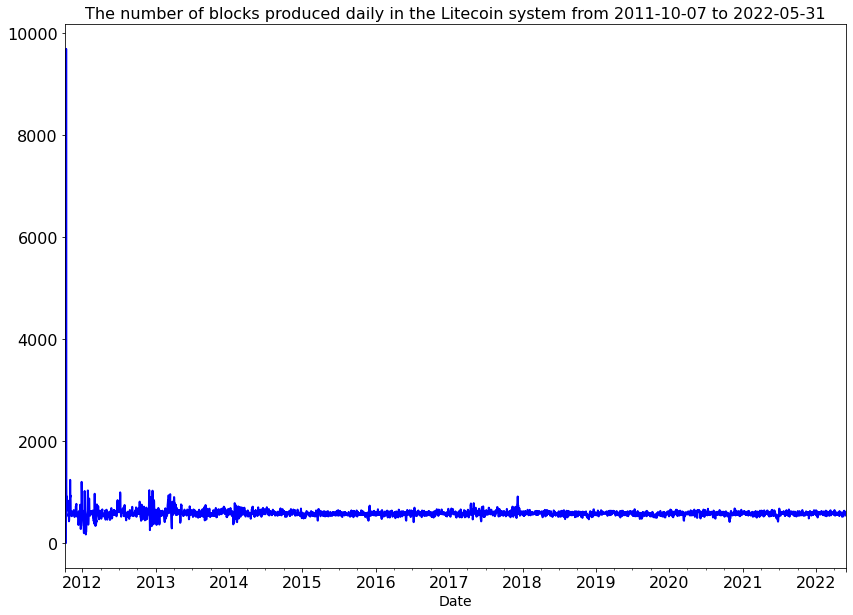

In [34]:
### Plot The number of block produced daily in the Bitcoin system.
ax = df_ltc['BlkCnt'].plot(color='blue', figsize=(14, 10), linewidth=2, fontsize=16)

# Specify the x-axis label in your plot
ax.set_xlabel('Date',fontsize=14)

# Specify the title in your plot
ax.set_title('The number of blocks produced daily in the Litecoin system from 2011-10-07 to 2022-05-31', fontsize=16)


# Show plot
plt.savefig('/content/drive/My Drive/PU & Trading/Litecoin/BlkCnt.png')

In [35]:
print(df_ltc['BlkCnt'].mean())

584.2962201079969


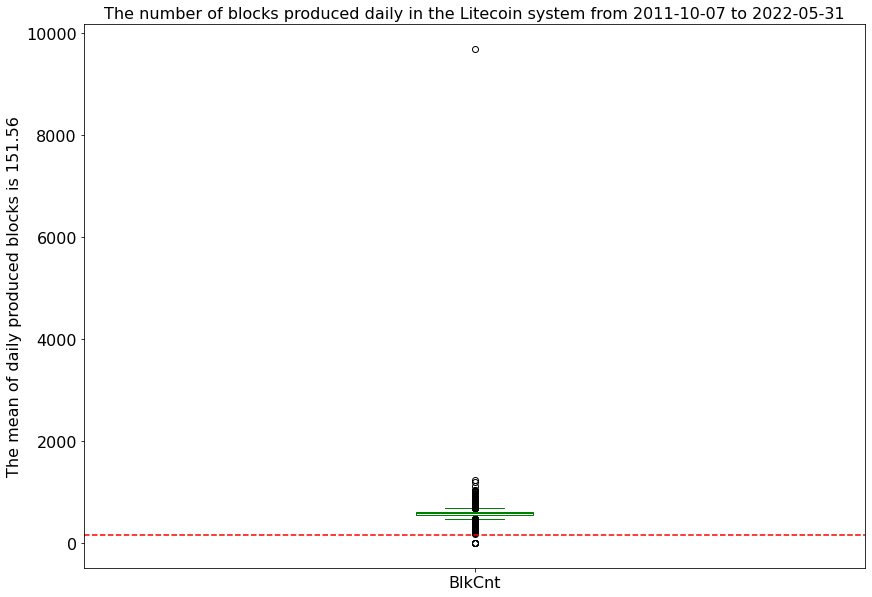

In [36]:
### Plot The Boxplot for number of block produced daily in the Bitcoin system.
###Check the types of plot: https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html
ax = df_ltc['BlkCnt'].plot(kind='box', color='green', figsize=(14, 10), fontsize=16)


# Specify the title in your plot
ax.set_title('The number of blocks produced daily in the Litecoin system from 2011-10-07 to 2022-05-31', fontsize=16)
ax.set_ylabel('The mean of daily produced blocks is 151.56', fontsize=16)


# Add a red horizontal line for the mean
ax.axhline(151.5588436148418, color='red', linestyle='--')
# Show plot
plt.savefig('/content/drive/My Drive/PU & Trading/Litecoin/ltc_blockdaily_boxplot.png')

In [37]:
plt.show()

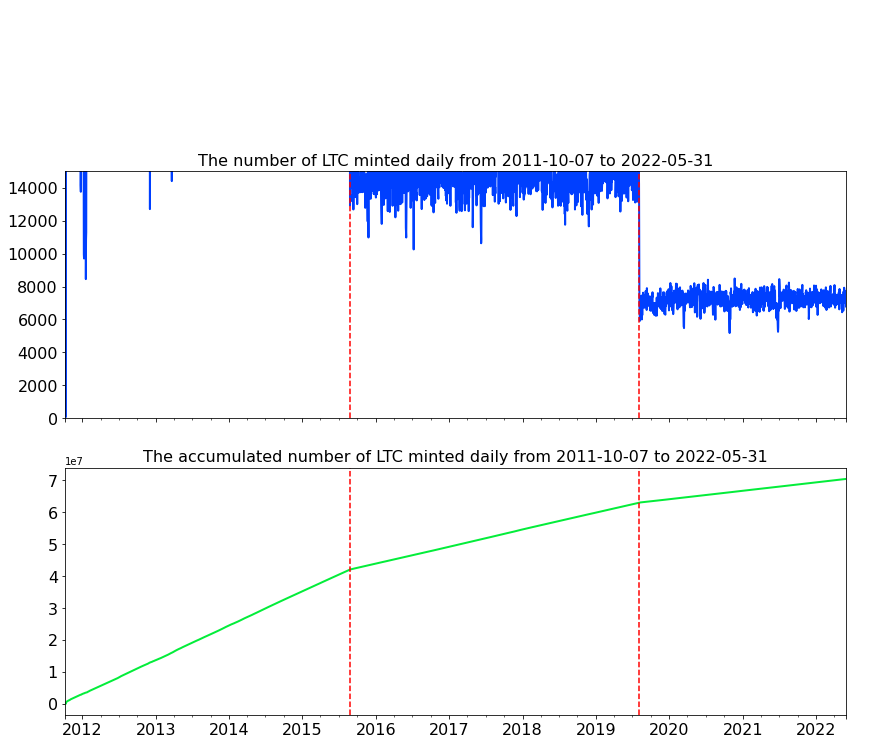

In [38]:
#### Plot The number and accumulated number of LTC minted daily in scatter plot and the total LTC minted in line plot
###Check all color maps here https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
ax = df_ltc[['IssTotNtv','SplyCur']].plot(figsize=(14, 10), linewidth=2, fontsize=16,subplots=True,legend=False, sharex=True, layout=(2,1))
ax[0][0].set_title('The number of LTC minted daily from 2011-10-07 to 2022-05-31',fontsize=16)
ax[1][0].set_title('The accumulated number of LTC minted daily from 2011-10-07 to 2022-05-31',fontsize=16)
ax[0][0].set_ylim([0,15000])
# Add a red vertical line for the first halving date
ax[0][0].axvline('2015-08-25', color='red', linestyle='--')
ax[1][0].axvline('2015-08-25', color='red', linestyle='--')
ax[0][0].annotate('the first halving date 2015-08-25',
            xy=('2015-09-25', 25000), 
            horizontalalignment='left', verticalalignment='top',fontsize=12)
# Add a red vertical line for the second halving date
ax[0][0].axvline('2019-08-05', color='red', linestyle='--')
ax[1][0].axvline('2019-08-05', color='red', linestyle='--')
ax[0][0].annotate('the second halving date 2019-08-05',
            xy=('2019-09-05', 20000), 
            horizontalalignment='left', verticalalignment='top',fontsize=12)

plt.savefig('/content/drive/My Drive/PU & Trading/Litecoin/ltc_halving.png')


In [39]:
####Calculate the annualized Litecoin dilution rate 
####More about Rolling average here: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html
####annualized dilution rate in percentage=100*365*the moving average of the number of generated ltc in the past 30 days/total generated btc
df_ltc['Annualized_DilutionRate']=100*365*df_ltc['IssTotNtv'].rolling(window=30).mean()/df_ltc['SplyCur']

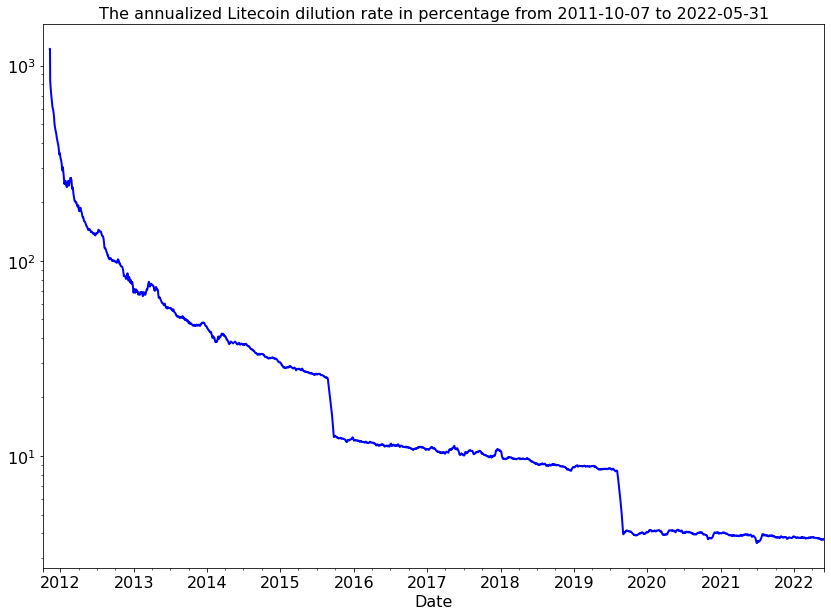

In [40]:
### Plot The annualized Litecoin dilution rate in percentage.
ax = df_ltc['Annualized_DilutionRate'].plot(color='blue', figsize=(14, 10), linewidth=2, fontsize=16)

# Specify the x-axis label in your plot
ax.set_xlabel('Date',fontsize=16)

# Specify the title in your plot
ax.set_title('The annualized Litecoin dilution rate in percentage from 2011-10-07 to 2022-05-31', fontsize=16)
ax.set_yscale('log')

# Show plot
plt.savefig('/content/drive/My Drive/PU & Trading/Litecoin/ltc_dilution.png')

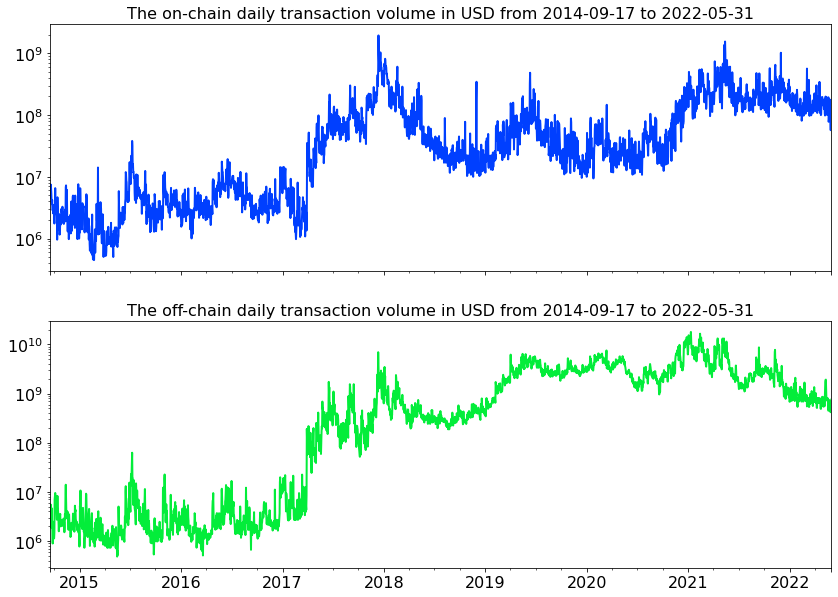

In [41]:
#### Plot the on-chain transaction volume and off-chain transaction volume
ax = df_ltc[['TxTfrValAdjUSD','Volume']]['2014-09-17': ].plot(figsize=(14, 10), linewidth=2, fontsize=16,subplots=True,legend=False, sharex=True, layout=(2,1))
ax[0][0].set_title('The on-chain daily transaction volume in USD from 2014-09-17 to 2022-05-31',fontsize=16)
ax[1][0].set_title('The off-chain daily transaction volume in USD from 2014-09-17 to 2022-05-31',fontsize=16)

ax[0][0].set_yscale('log')
ax[1][0].set_yscale('log')
plt.savefig('/content/drive/My Drive/PU & Trading/Litecoin/ltc_volume_two.png')

In [42]:
###calculate the total transaction volume
####calculate daily Revenue 
df_ltc['Total daily transaction volume']=df_ltc['TxTfrValAdjUSD']+df_ltc['Volume']
df_ltc['Total daily transaction volume']['2013-04-01':'2014-09-16']=df_ltc['TxTfrValAdjUSD']['2013-04-01':'2014-09-16']
df_ltc[['Total daily transaction volume','TxTfrValAdjUSD','Volume']]['2013-04-01':'2014-09-16']

<ipython-input-42-b9625cecfbec>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ltc['Total daily transaction volume']['2013-04-01':'2014-09-16']=df_ltc['TxTfrValAdjUSD']['2013-04-01':'2014-09-16']


,Total daily transaction volume,TxTfrValAdjUSD,Volume
2013-04-01,2.782745e+06,2.782745e+06,NaN
2013-04-02,9.850541e+06,9.850541e+06,NaN
2013-04-03,4.936497e+06,4.936497e+06,NaN
2013-04-04,4.456535e+06,4.456535e+06,NaN
2013-04-05,2.741063e+06,2.741063e+06,NaN
...,...,...,...
2014-09-12,5.145194e+06,5.145194e+06,2226060.0
2014-09-13,3.978018e+06,3.978018e+06,2376730.0
2014-09-14,3.358370e+06,3.358370e+06,2082360.0
2014-09-15,6.742189e+06,6.742189e+06,3140670.0


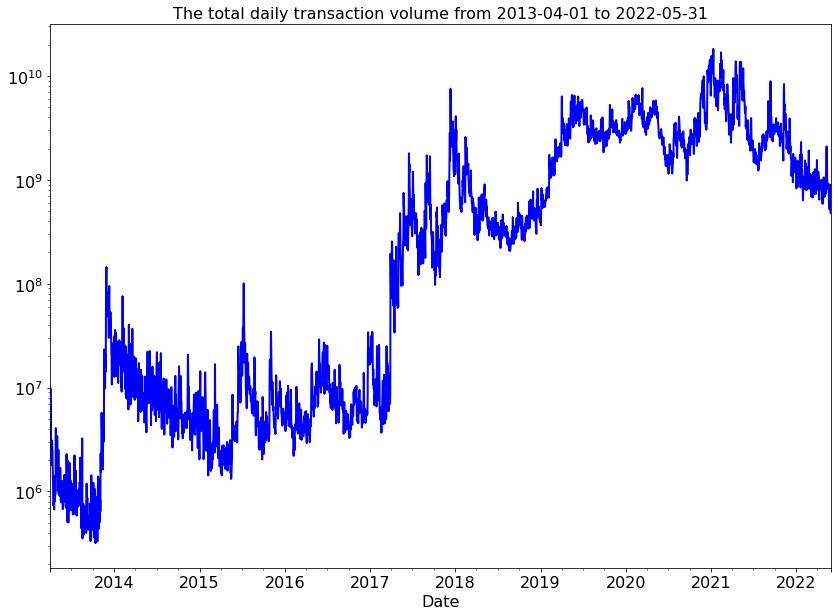

In [43]:
###Plot total daily transaction volume
ax = df_ltc['Total daily transaction volume']['2013-04-01':].plot(color='blue', figsize=(14, 10), linewidth=2, fontsize=16)

# Specify the x-axis label in your plot
ax.set_xlabel('Date',fontsize=16)

# Specify the title in your plot
ax.set_title('The total daily transaction volume from 2013-04-01 to 2022-05-31', fontsize=16)

# Show plot
ax.set_yscale('log')
plt.savefig('/content/drive/My Drive/PU & Trading/Litecoin/ltc_volume_total')

In [44]:
####Calculate the velocity
####More about Rolling average here: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html
####The velocity in percentage=100*the moving average of the volumn in the past 90 days/total market cap
df_ltc['Velocity']=100*df_ltc['Total daily transaction volume'].rolling(window=90).mean()/df_ltc['CapMrktCurUSD']

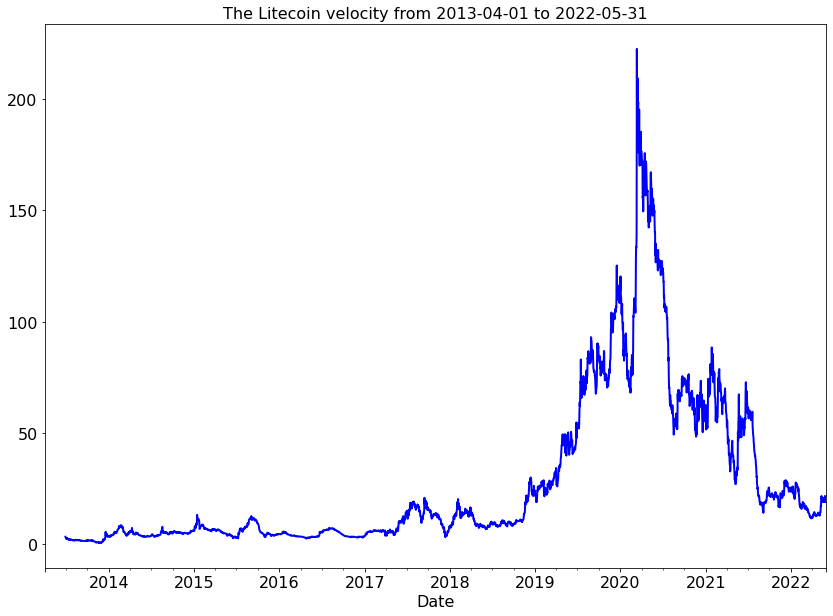

In [45]:
### Plot The Litecoin velocity in percentage
ax = df_ltc['Velocity']['2013-04-01':].plot(color='blue', figsize=(14, 10), linewidth=2, fontsize=16)

# Specify the x-axis label in your plot
ax.set_xlabel('Date',fontsize=16)

# Specify the title in your plot
ax.set_title('The Litecoin velocity from 2013-04-01 to 2022-05-31', fontsize=16)

# Show plot
plt.savefig('/content/drive/My Drive/PU & Trading/Litecoin/ltc_velocity.png')

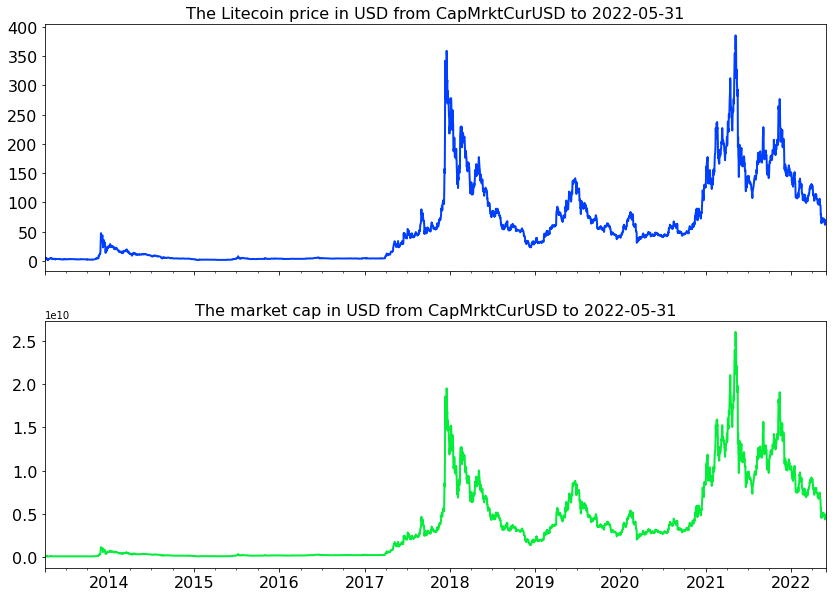

In [48]:
#### Plot litecoin price and the market cap
ax = df_ltc[['PriceUSD','CapMrktCurUSD']]['2013-04-01': ].plot(figsize=(14, 10), linewidth=2, fontsize=16,subplots=True,legend=False, sharex=True, layout=(2,1))
ax[0][0].set_title('The Litecoin price in USD from CapMrktCurUSD to 2022-05-31',fontsize=16)
ax[1][0].set_title('The market cap in USD from CapMrktCurUSD to 2022-05-31',fontsize=16)
plt.savefig('/content/drive/My Drive/PU & Trading/Litecoin/ltc_P_M.png')

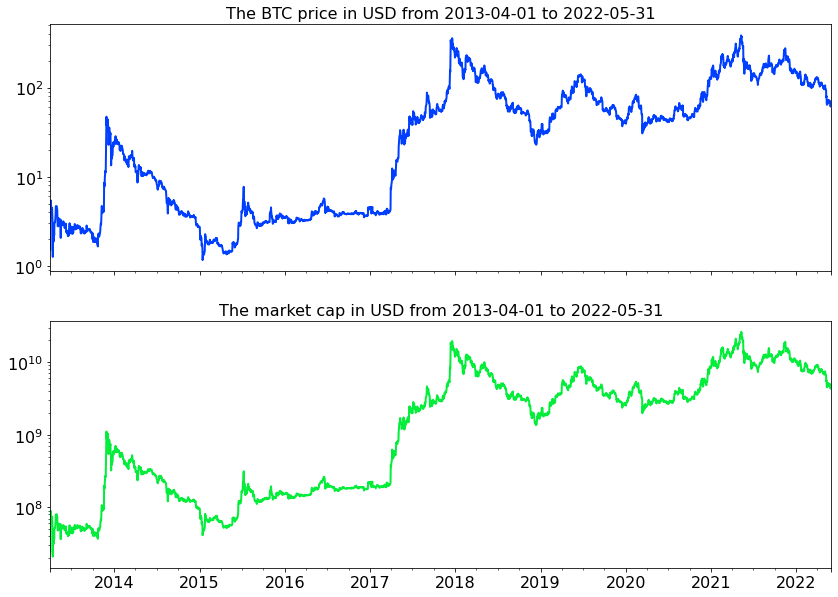

In [49]:
#### Plot litecoin price and the market cap
ax = df_ltc[['PriceUSD','CapMrktCurUSD']]['2013-04-01': ].plot(figsize=(14, 10), linewidth=2, fontsize=16,subplots=True,legend=False, sharex=True, layout=(2,1))
ax[0][0].set_title('The BTC price in USD from 2013-04-01 to 2022-05-31',fontsize=16)
ax[1][0].set_title('The market cap in USD from 2013-04-01 to 2022-05-31',fontsize=16)
ax[0][0].set_yscale('log')
ax[1][0].set_yscale('log')
plt.savefig('/content/drive/My Drive/PU & Trading/Litecoin/ltc_P_M_log.png')

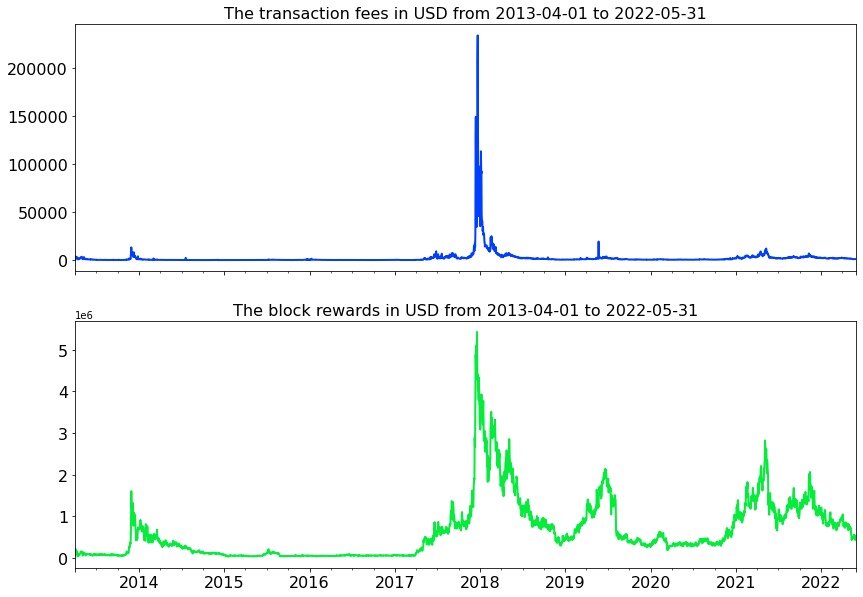

In [50]:
#####plot Miners' revenue in USD: transaction fees and block rewards
ax = df_ltc[['FeeTotUSD','IssTotUSD']]['2013-04-01': ].plot(figsize=(14, 10), linewidth=2, fontsize=16,subplots=True,legend=False, sharex=True, layout=(2,1))
ax[0][0].set_title('The transaction fees in USD from 2013-04-01 to 2022-05-31',fontsize=16)
ax[1][0].set_title('The block rewards in USD from 2013-04-01 to 2022-05-31',fontsize=16)
plt.savefig('/content/drive/My Drive/PU & Trading/Litecoin/ltc_Revenue.png')

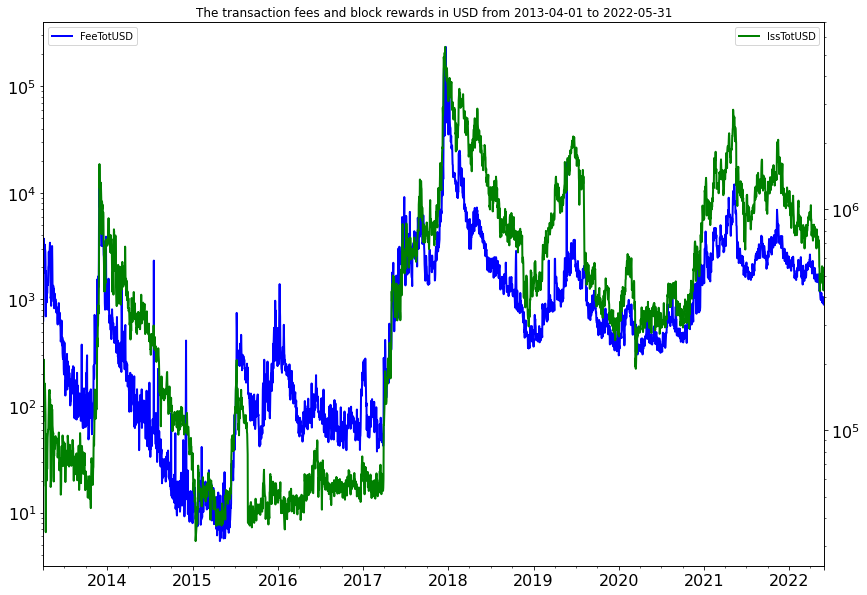

In [51]:
fig, ax1 =plt.subplots()
ax1 = df_ltc['FeeTotUSD']['2013-04-01': ].plot(figsize=(14, 10), linewidth=2, fontsize=16, color='blue')
plt.legend(loc='upper left')
ax2=ax1.twinx()
ax2=df_ltc['IssTotUSD']['2013-04-01': ].plot(figsize=(14, 10), linewidth=2, fontsize=16,color='green')
ax1.set_yscale('log')
ax2.set_yscale('log')
plt.title('The transaction fees and block rewards in USD from 2013-04-01 to 2022-05-31')
plt.legend(loc='best')
plt.savefig('/content/drive/My Drive/PU & Trading/Litecoin/ltc_tb.png')

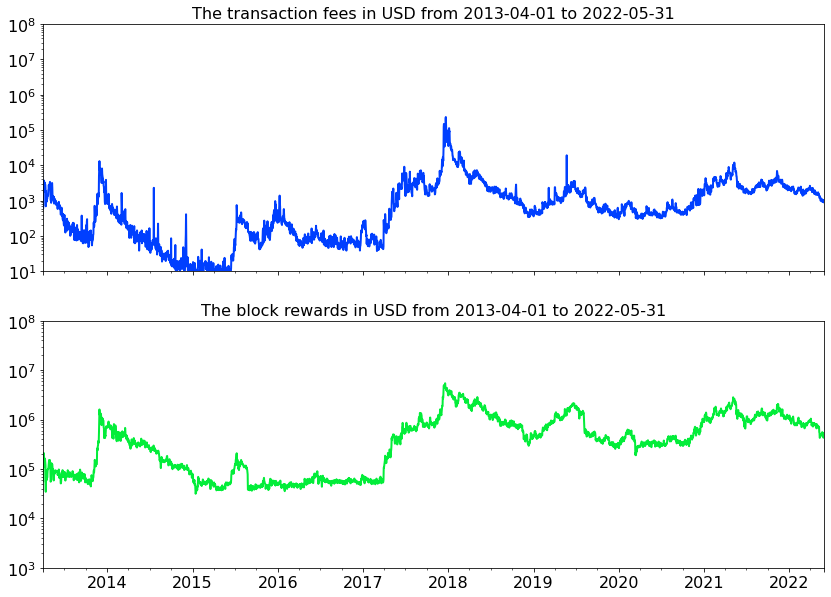

In [52]:
#####plot Miners' revenue in USD: transaction fees and block rewards
ax = df_ltc[['FeeTotUSD','IssTotUSD']]['2013-04-01': ].plot(figsize=(14, 10), linewidth=2, fontsize=16,subplots=True,legend=False, sharex=True, layout=(2,1))
ax[0][0].set_title('The transaction fees in USD from 2013-04-01 to 2022-05-31',fontsize=16)
ax[1][0].set_title('The block rewards in USD from 2013-04-01 to 2022-05-31',fontsize=16)
ax[0][0].set_yscale('log')
ax[1][0].set_yscale('log')
ax[0][0].set_ylim([10,100000000])
ax[1][0].set_ylim([1000,100000000])
plt.savefig('/content/drive/My Drive/PU & Trading/Litecoin/ltc_Revenue_log.png')

In [53]:
####calculate daily Revenue 
df_ltc['The daily revenue of litecoin miners']=df_ltc['IssTotUSD']+df_ltc['FeeTotUSD']
###calcualte the accumulated revenue 
df_ltc['The accumulated revenue of litecoin miners']=df_ltc['The daily revenue of litecoin miners'].cumsum()

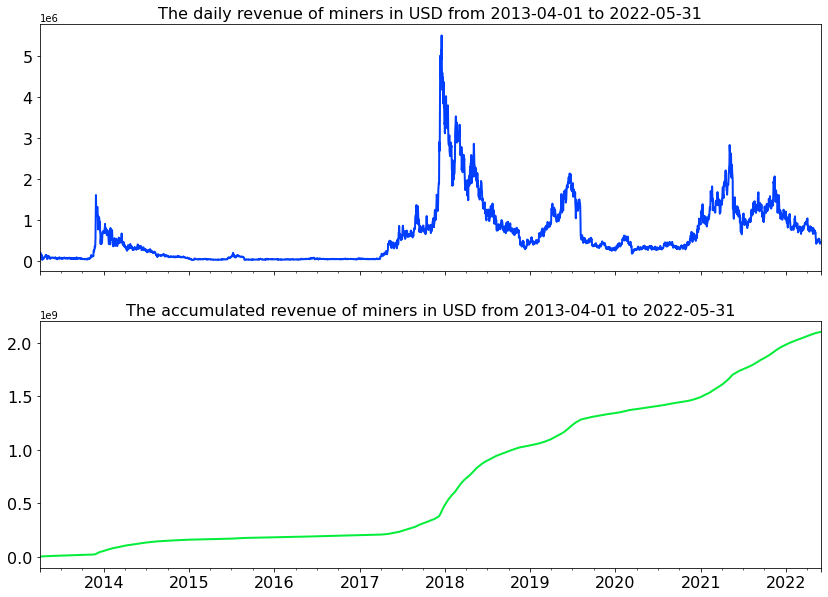

In [54]:
#####plot the daily revenue and the accumulated revenue of litecoin miners
ax = df_ltc[['The daily revenue of litecoin miners','The accumulated revenue of litecoin miners']]['2013-04-01': ].plot(figsize=(14, 10), linewidth=2, fontsize=16,subplots=True,legend=False, sharex=True, layout=(2,1))
ax[0][0].set_title('The daily revenue of miners in USD from 2013-04-01 to 2022-05-31',fontsize=16)
ax[1][0].set_title('The accumulated revenue of miners in USD from 2013-04-01 to 2022-05-31',fontsize=16)
plt.savefig('/content/drive/My Drive/PU & Trading/Litecoin/ltc_Revenue_merged.png')

In [55]:
####calculate daily Revenue 
df_ltc['The daily revenue of litecoin miners']=df_ltc['IssTotUSD']+df_ltc['FeeTotUSD']
###calcualte the accumulated revenue 
df_ltc['The accumulated revenue of litecoin miners']=df_ltc['The daily revenue of litecoin miners'].cumsum()

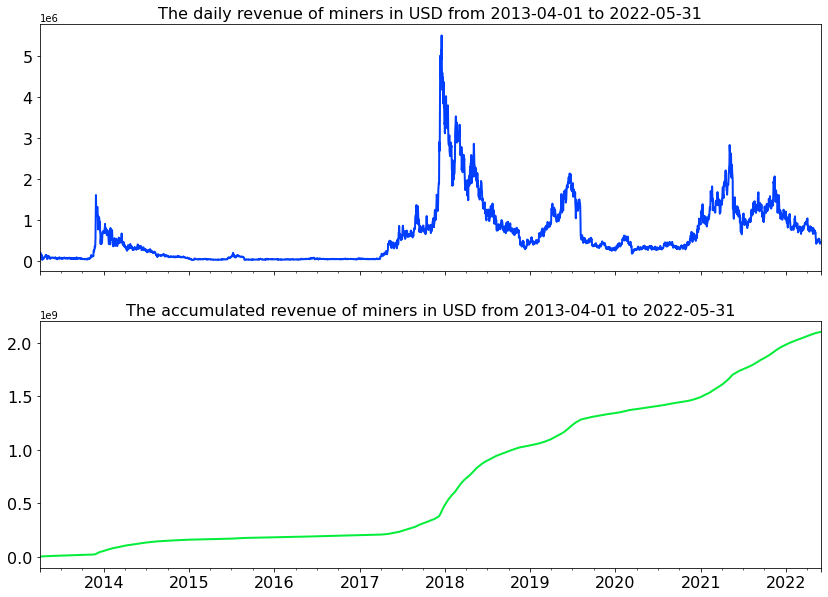

In [56]:
#####plot the daily revenue and the accumulated revenue of litecoin miners
ax = df_ltc[['The daily revenue of litecoin miners','The accumulated revenue of litecoin miners']]['2013-04-01': ].plot(figsize=(14, 10), linewidth=2, fontsize=16,subplots=True,legend=False, sharex=True, layout=(2,1))
ax[0][0].set_title('The daily revenue of miners in USD from 2013-04-01 to 2022-05-31',fontsize=16)
ax[1][0].set_title('The accumulated revenue of miners in USD from 2013-04-01 to 2022-05-31',fontsize=16)
plt.savefig('/content/drive/My Drive/PU & Trading/Litecoin/ltc_Revenue_merged.png')

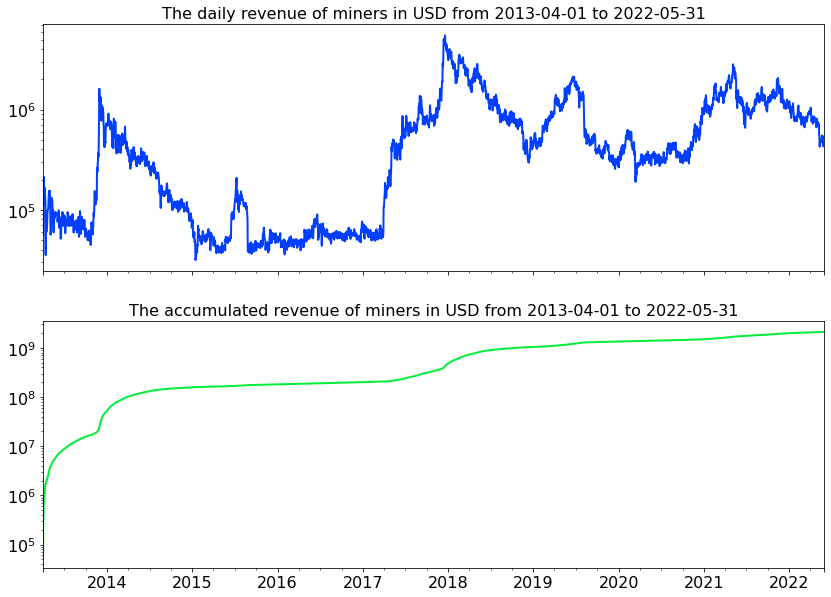

In [57]:
#####plot the daily revenue and the accumulated revenue of litecoin miners
ax = df_ltc[['The daily revenue of litecoin miners','The accumulated revenue of litecoin miners']]['2013-04-01': ].plot(figsize=(14, 10), linewidth=2, fontsize=16,subplots=True,legend=False, sharex=True, layout=(2,1))
ax[0][0].set_title('The daily revenue of miners in USD from 2013-04-01 to 2022-05-31',fontsize=16)
ax[1][0].set_title('The accumulated revenue of miners in USD from 2013-04-01 to 2022-05-31',fontsize=16)
ax[0][0].set_yscale('log')
ax[1][0].set_yscale('log')
plt.savefig('/content/drive/My Drive/PU & Trading/Litecoin/ltc_Revenue_merged_log.png')

In [58]:
###calculate P/E Ratio=MarketCap/365*the moving average of miner's revenue in the past 365 days
df_ltc['P/E Ratio']=df_ltc['CapMrktCurUSD']/(365*df_ltc['The daily revenue of litecoin miners'])

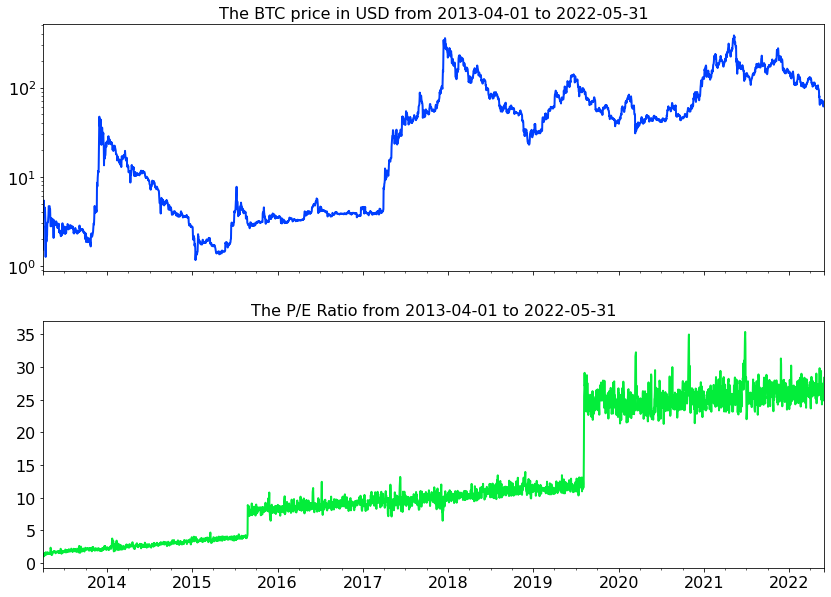

In [59]:
#####plot the litecoin price and the PE Ratio
ax = df_ltc[['PriceUSD','P/E Ratio']]['2013-04-01': ].plot(figsize=(14, 10), linewidth=2, fontsize=16,subplots=True,legend=False, sharex=True, layout=(2,1))
ax[0][0].set_title('The BTC price in USD from 2013-04-01 to 2022-05-31',fontsize=16)
ax[1][0].set_title('The P/E Ratio from 2013-04-01 to 2022-05-31',fontsize=16)
ax[0][0].set_yscale('log')
plt.savefig('/content/drive/My Drive/PU & Trading/Litecoin/ltc_PE_log.png')

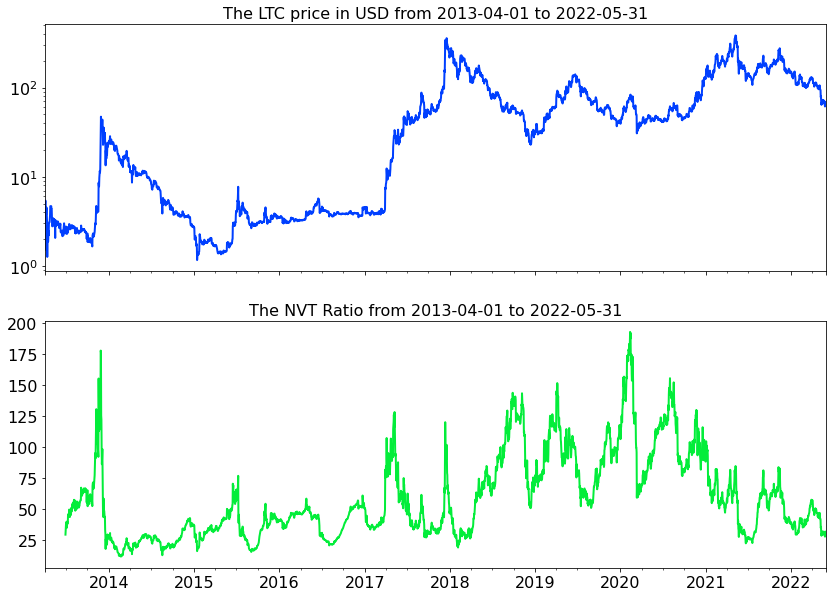

In [60]:
#####plot the litecion price and the NVT 90 Adjusted Ration
ax = df_ltc[['PriceUSD','NVTAdj90']]['2013-04-01': ].plot(figsize=(14, 10), linewidth=2, fontsize=16,subplots=True,legend=False, sharex=True, layout=(2,1))
ax[0][0].set_title('The LTC price in USD from 2013-04-01 to 2022-05-31',fontsize=16)
ax[1][0].set_title('The NVT Ratio from 2013-04-01 to 2022-05-31',fontsize=16)
ax[0][0].set_yscale('log')
plt.savefig('/content/drive/My Drive/PU & Trading/Litecoin/ltc_NVT_log.png')

In [61]:
df_ltc['Metcalfe']=df_ltc['AdrActCnt'].pow(2)
df_ltc['PM']=df_ltc['PriceUSD']/df_ltc['Metcalfe']

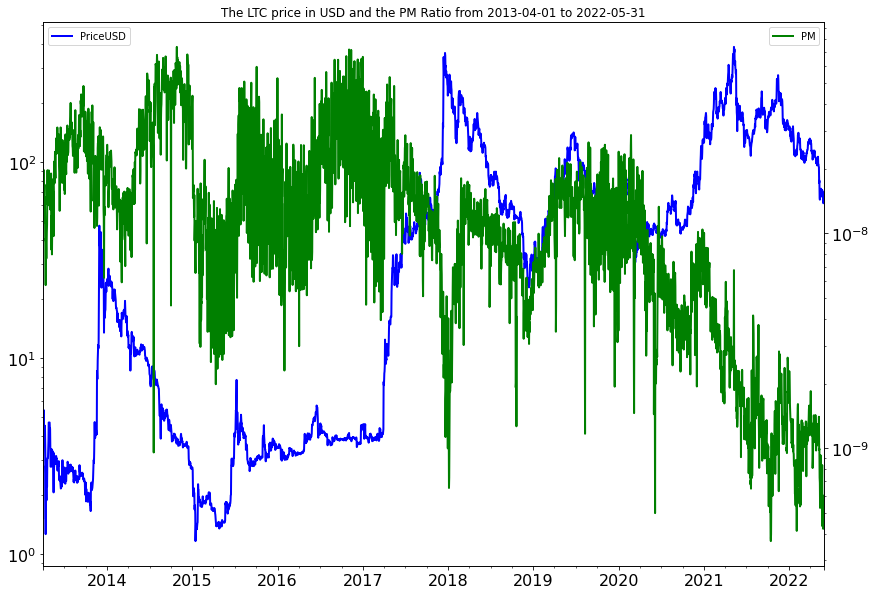

In [62]:
fig, ax1 =plt.subplots()
ax1 = df_ltc['PriceUSD']['2013-04-01': ].plot(figsize=(14, 10), linewidth=2, fontsize=16, color='blue')
plt.legend(loc='upper left')
ax2=ax1.twinx()
ax2=df_ltc['PM']['2013-04-01': ].plot(figsize=(14, 10), linewidth=2, fontsize=16,color='green')
ax1.set_yscale('log')
ax2.set_yscale('log')
plt.title('The LTC price in USD and the PM Ratio from 2013-04-01 to 2022-05-31')
plt.legend(loc='best')
plt.savefig('/content/drive/My Drive/PU & Trading/Litecoin/ltc_PTM.png')

UTXO Part

In [63]:
df_UTXO=pd.read_csv("https://raw.githubusercontent.com/SciEcon/bitcoin_golden_litecoin_silver/main/PU%20ratio%20%26%20Trading/LTC/litecoinResultUTXO2022-05-31.csv",index_col="Unnamed: 0")
df_UTXO.head()

,<1d,1d ~ 1m,1m ~ 1q,1q ~ 6m,6m ~ 1y,1y ~ 2y,2y ~ 3y,3y ~ 4y,4y ~ 5y,5y~10y,>10y,date
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2011/1/1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2011/1/2
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2011/1/3
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2011/1/4
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2011/1/5


In [64]:
#set "date" column as the index
df_UTXO.set_index('date', inplace=True)
#to remove the name of the index
df_UTXO.index.name=None
df_UTXO.tail()

,<1d,1d ~ 1m,1m ~ 1q,1q ~ 6m,6m ~ 1y,1y ~ 2y,2y ~ 3y,3y ~ 4y,4y ~ 5y,5y~10y,>10y
2022/5/27,2907726.552,7904821.315,5496592.156,11302133.77,8484540.969,11435054.06,3797740.539,9225857.553,5737529.570,3729712.718,358749.0226
2022/5/28,2485904.424,8201573.880,5596423.027,11263731.86,8502925.157,11486764.14,3792093.094,9229192.238,5738848.856,3730873.008,359628.5439
2022/5/29,2681899.345,8023589.348,5374222.853,11229200.18,8736150.866,11498866.23,3787377.075,9230013.020,5741512.090,3731773.969,360703.2520
2022/5/30,2991578.461,7642384.812,5590865.767,11089484.27,8717514.852,11519505.39,3782616.773,9231736.472,5742586.357,3731888.753,361933.8253
2022/5/31,3968334.848,6733587.621,5518952.055,11071265.58,8730607.708,11550124.52,3781325.753,9213463.772,5740927.789,3737139.259,362429.3328


In [66]:
####Exploring the age of litecoin
df_UTXO.info()
###the column marked with y are accumulated values and the column marked with text are interval values

<class 'pandas.core.frame.DataFrame'>
Index: 4169 entries, 2011/1/1 to 2022/5/31
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   <1d      4169 non-null   float64
 1   1d ~ 1m  4169 non-null   float64
 2   1m ~ 1q  4169 non-null   float64
 3   1q ~ 6m  4169 non-null   float64
 4   6m ~ 1y  4169 non-null   float64
 5   1y ~ 2y  4169 non-null   float64
 6   2y ~ 3y  4169 non-null   float64
 7   3y ~ 4y  4169 non-null   float64
 8   4y ~ 5y  4169 non-null   float64
 9    5y~10y  4169 non-null   float64
 10  >10y     4169 non-null   float64
dtypes: float64(11)
memory usage: 390.8+ KB


In [67]:
df_UTXO.columns

Index(['<1d', '1d ~ 1m', '1m ~ 1q', '1q ~ 6m', '6m ~ 1y', '1y ~ 2y', '2y ~ 3y',
       '3y ~ 4y', '4y ~ 5y', ' 5y~10y', '>10y'],
      dtype='object')

In [68]:
#generate the percentage
df_UTXO = df_UTXO.apply(lambda x: x/x.sum(), axis=1)
df_UTXO.head()

,<1d,1d ~ 1m,1m ~ 1q,1q ~ 6m,6m ~ 1y,1y ~ 2y,2y ~ 3y,3y ~ 4y,4y ~ 5y,5y~10y,>10y
2011/1/1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011/1/2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011/1/3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011/1/4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011/1/5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
df_UTXO.index =pd.to_datetime(df_UTXO.index)

<Figure size 1008x720 with 0 Axes>

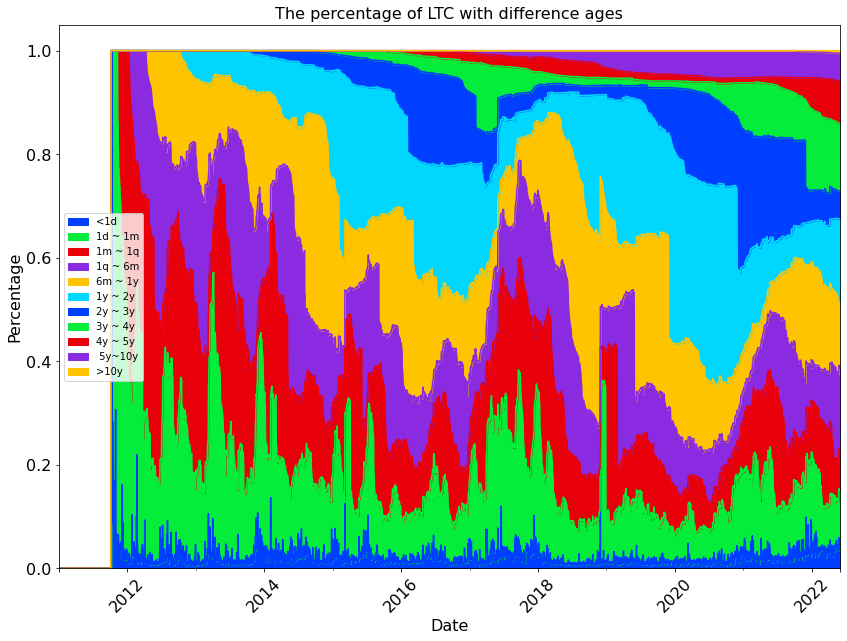

In [70]:
plt.figure(figsize=(14, 10))
df_UTXO.plot.area(figsize=(14,10), fontsize=16)
plt.xlabel('Date',fontsize=16)
plt.ylabel('Percentage',fontsize=16)
plt.title('The percentage of LTC with difference ages',fontsize=16)
plt.xticks(rotation=45)
plt.savefig('/content/drive/My Drive/PU & Trading/Litecoin/ltc_StakedAge.png')

In [71]:
###Calculate Staking Ratio in different years
df_UTXO['One-year staking ratio']=df_UTXO[['1y ~ 2y', '2y ~ 3y','3y ~ 4y', '4y ~ 5y', ' 5y~10y', '>10y']].sum(axis=1)
df_UTXO['Two-year staking ratio']=df_UTXO[['2y ~ 3y','3y ~ 4y', '4y ~ 5y', ' 5y~10y', '>10y']].sum(axis=1)
df_UTXO['Three-year staking ratio']=df_UTXO[['3y ~ 4y', '4y ~ 5y', ' 5y~10y', '>10y']].sum(axis=1)
df_UTXO['Four-year staking ratio']=df_UTXO[['4y ~ 5y', ' 5y~10y', '>10y']].sum(axis=1)
df_UTXO['Five-year staking ratio']=df_UTXO[[' 5y~10y', '>10y']].sum(axis=1)
df_UTXO['Ten-year staking ratio']=df_UTXO[[ '>10y']].sum(axis=1)
df_UTXO.tail()

,<1d,1d ~ 1m,1m ~ 1q,1q ~ 6m,6m ~ 1y,1y ~ 2y,2y ~ 3y,3y ~ 4y,4y ~ 5y,5y~10y,>10y,One-year staking ratio,Two-year staking ratio,Three-year staking ratio,Four-year staking ratio,Five-year staking ratio,Ten-year staking ratio
2022-05-27,0.041314,0.112316,0.078098,0.160586,0.120553,0.162475,0.053960,0.131085,0.081522,0.052994,0.005097,0.487133,0.324658,0.270698,0.139612,0.058091,0.005097
2022-05-28,0.035317,0.116520,0.079508,0.160024,0.120801,0.163192,0.053874,0.131119,0.081532,0.053004,0.005109,0.487831,0.324638,0.270764,0.139645,0.058114,0.005109
2022-05-29,0.038098,0.113979,0.076343,0.159516,0.124101,0.163347,0.053802,0.131117,0.081561,0.053012,0.005124,0.487962,0.324615,0.270814,0.139697,0.058136,0.005124
2022-05-30,0.042493,0.108553,0.079413,0.157516,0.123825,0.163624,0.053729,0.131129,0.081568,0.053008,0.005141,0.488199,0.324575,0.270846,0.139718,0.058149,0.005141
2022-05-31,0.056362,0.095636,0.078385,0.157244,0.124000,0.164045,0.053706,0.130858,0.081538,0.053078,0.005148,0.488373,0.324327,0.270621,0.139764,0.058226,0.005148


<Figure size 1008x720 with 0 Axes>

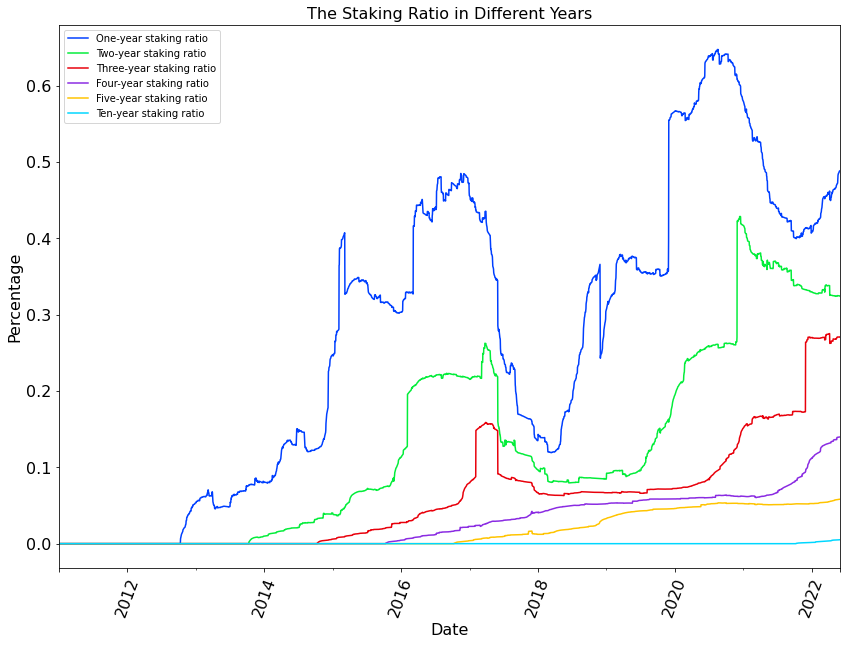

In [72]:
plt.figure(figsize=(14, 10))
df_UTXO[['One-year staking ratio','Two-year staking ratio','Three-year staking ratio','Four-year staking ratio','Five-year staking ratio','Ten-year staking ratio']].plot(figsize=(14,10), fontsize=16)
plt.xlabel('Date',fontsize=16)
plt.ylabel('Percentage',fontsize=16)
plt.title('The Staking Ratio in Different Years',fontsize=16)
plt.xticks(rotation=70)
plt.savefig('/content/drive/My Drive/PU & Trading/Litecoin/ltc_SR.png')

UTXO Part End

In [73]:
df_ltc.index=pd.to_datetime(df_ltc.index)
df_UTXO.index=pd.to_datetime(df_UTXO.index)
df = pd.merge(df_ltc, df_UTXO, how='outer', left_index=True, right_index=True)
df.head()

,AdrActCnt,AdrBal1in100KCnt,AdrBal1in100MCnt,AdrBal1in10BCnt,AdrBal1in10KCnt,AdrBal1in10MCnt,AdrBal1in1BCnt,AdrBal1in1KCnt,AdrBal1in1MCnt,AdrBalCnt,...,3y ~ 4y,4y ~ 5y,5y~10y,>10y,One-year staking ratio,Two-year staking ratio,Three-year staking ratio,Four-year staking ratio,Five-year staking ratio,Ten-year staking ratio
2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0


In [74]:
###token utility=100*velocity*staking ratio/(diluation rate*velocity)
df['Token Utility']=100*df['Velocity']*df['One-year staking ratio']/df['Annualized_DilutionRate']

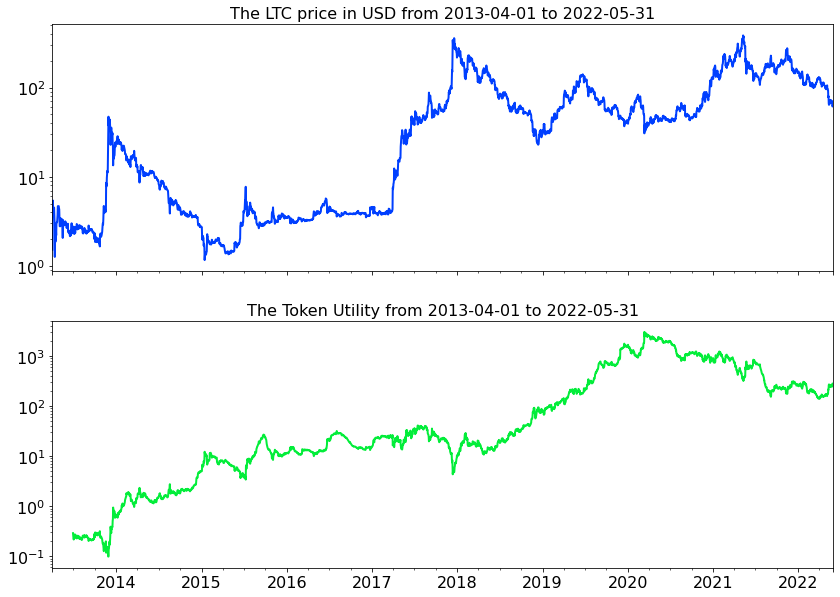

In [75]:
#####plot the litecion price and the token utility
ax = df[['PriceUSD','Token Utility']]['2013-04-01': ].plot(figsize=(14, 10), linewidth=2, fontsize=16,subplots=True,legend=False, sharex=True, layout=(2,1))
ax[0][0].set_title('The LTC price in USD from 2013-04-01 to 2022-05-31',fontsize=16)
ax[1][0].set_title('The Token Utility from 2013-04-01 to 2022-05-31',fontsize=16)
ax[0][0].set_yscale('log')
ax[1][0].set_yscale('log')
plt.savefig('/content/drive/My Drive/PU & Trading/Litecoin/ltc_TU_log.png')

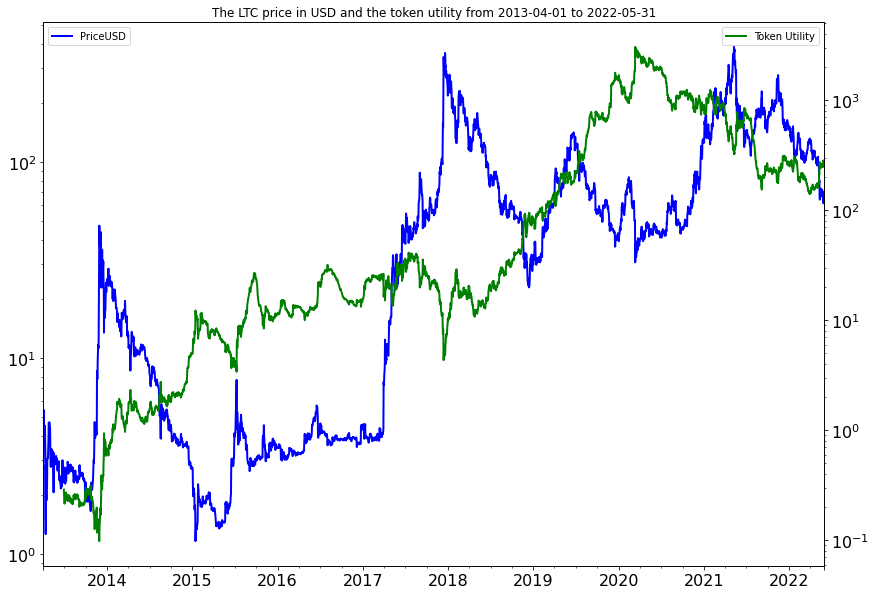

In [76]:
fig, ax1 =plt.subplots()
ax1 = df['PriceUSD']['2013-04-01': ].plot(figsize=(14, 10), linewidth=2, fontsize=16, color='blue')
plt.legend(loc='upper left')
ax2=ax1.twinx()
ax2=df['Token Utility']['2013-04-01': ].plot(figsize=(14, 10), linewidth=2, fontsize=16,color='green')
ax1.set_yscale('log')
ax2.set_yscale('log')
plt.title('The LTC price in USD and the token utility from 2013-04-01 to 2022-05-31')
plt.legend(loc='best')
plt.savefig('/content/drive/My Drive/PU & Trading/Litecoin/ltc_TU_log_same.png')

In [77]:
###Calculate PU Ratio
df['PU Ratio']=df['PriceUSD']/df['Token Utility']

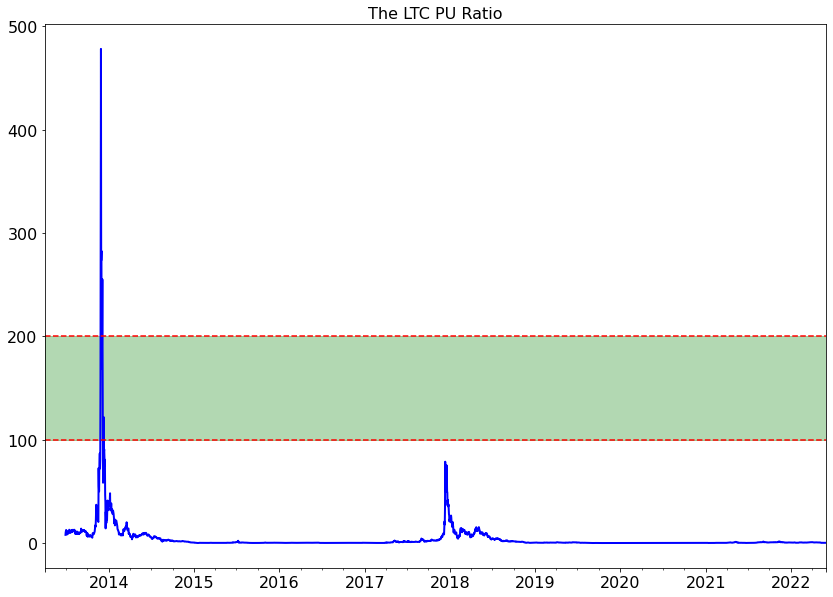

In [78]:
ax=df['PU Ratio']['2013-04-01': ].plot(figsize=(14, 10), linewidth=2, fontsize=16, color='blue')
ax.axhspan(100, 200, color='green', alpha=0.3)
ax.axhline(100, color='red', linestyle='--')
ax.axhline(200, color='red', linestyle='--')
plt.title('The LTC PU Ratio',fontsize=16)
plt.savefig('/content/drive/My Drive/PU & Trading/Litecoin/ltc_PU.png')

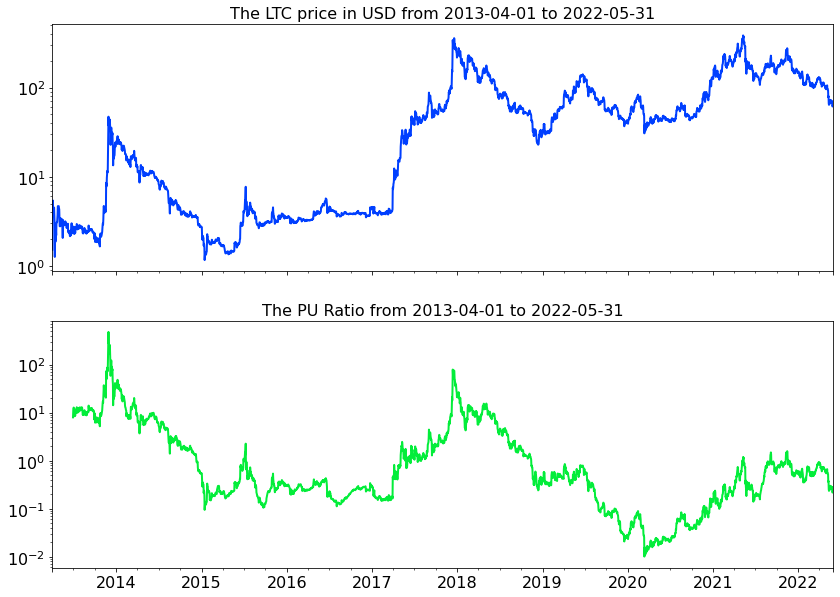

In [79]:
#####plot the litecion price and the PU Ratio
ax = df[['PriceUSD','PU Ratio']]['2013-04-01': ].plot(figsize=(14, 10), linewidth=2, fontsize=16,subplots=True,legend=False, sharex=True, layout=(2,1))
ax[0][0].set_title('The LTC price in USD from 2013-04-01 to 2022-05-31',fontsize=16)
ax[1][0].set_title('The PU Ratio from 2013-04-01 to 2022-05-31',fontsize=16)
ax[0][0].set_yscale('log')
ax[1][0].set_yscale('log')
plt.savefig('/content/drive/My Drive/PU & Trading/Litecoin/ltc_PU_log.png')

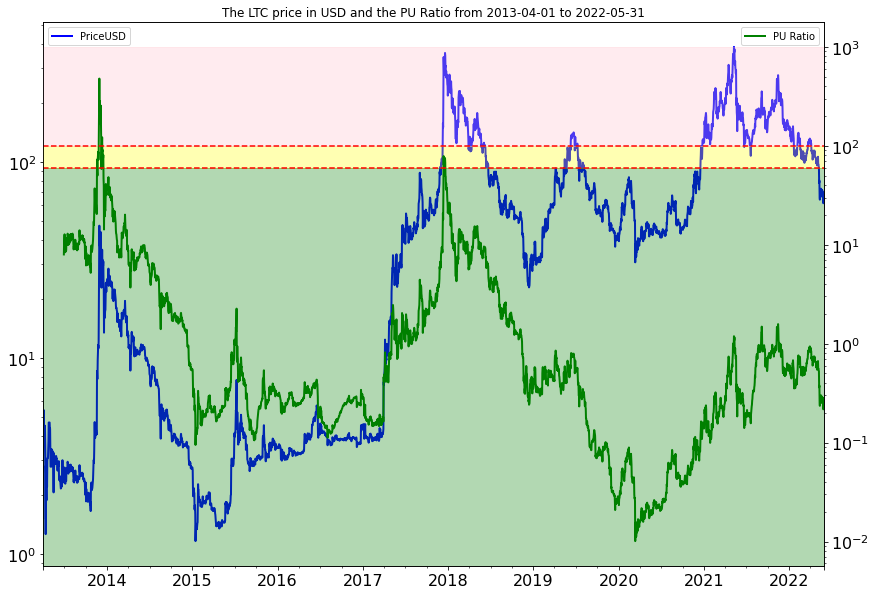

In [80]:
fig, ax1 =plt.subplots()
ax1 = df['PriceUSD']['2013-04-01': ].plot(figsize=(14, 10), linewidth=2, fontsize=16, color='blue')
plt.legend(loc='upper left')
ax2=ax1.twinx()
ax2=df['PU Ratio']['2013-04-01': ].plot(figsize=(14, 10), linewidth=2, fontsize=16,color='green')
ax1.set_yscale('log')
ax2.set_yscale('log')
plt.title('The LTC price in USD and the PU Ratio from 2013-04-01 to 2022-05-31')
####More about linestyle: https://matplotlib.org/3.1.0/gallery/lines_bars_and_markers/linestyles.html
ax2.axhline(60, color='red', linestyle='--')
ax2.axhline(100, color='red', linestyle='--')
ax2.axhspan(60, 100, color='yellow', alpha=0.3)
ax2.axhspan(100, 1000, color='pink', alpha=0.3)
ax2.axhspan(0, 60, color='green', alpha=0.3)



plt.legend(loc='best')
plt.savefig('/content/drive/My Drive/PU & Trading/Litecoin/ltc_PU_log_same_2.png')

In [81]:
df.head()

,AdrActCnt,AdrBal1in100KCnt,AdrBal1in100MCnt,AdrBal1in10BCnt,AdrBal1in10KCnt,AdrBal1in10MCnt,AdrBal1in1BCnt,AdrBal1in1KCnt,AdrBal1in1MCnt,AdrBalCnt,...,5y~10y,>10y,One-year staking ratio,Two-year staking ratio,Three-year staking ratio,Four-year staking ratio,Five-year staking ratio,Ten-year staking ratio,Token Utility,PU Ratio
2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2011-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2011-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2011-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2011-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


In [82]:
###The definition of the volatility
###The 180D volatility, measured as the standard deviation of the natural log of daily returns over the past 180 days.
df['volatility30']=(np.log(df['PriceUSD']/df['PriceUSD'].shift(1))).rolling(window=30).std()
df['volatility60']=(np.log(df['PriceUSD']/df['PriceUSD'].shift(1))).rolling(window=60).std()
df['volatility90']=(np.log(df['PriceUSD']/df['PriceUSD'].shift(1))).rolling(window=90).std()
df['volatility180']=(np.log(df['PriceUSD']/df['PriceUSD'].shift(1))).rolling(window=180).std()

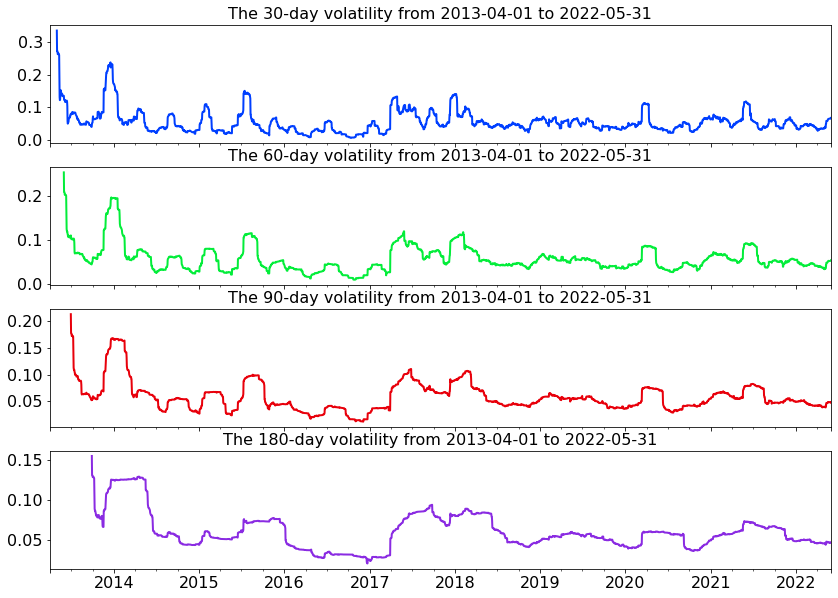

In [83]:
#######plot Volatility using our own calculation
ax = df[['volatility30','volatility60','volatility90','volatility180']]['2013-04-01': ].plot(figsize=(14, 10), linewidth=2, fontsize=16,subplots=True,legend=False, sharex=True, layout=(4,1))
ax[0][0].set_title('The 30-day volatility from 2013-04-01 to 2022-05-31',fontsize=16)
ax[1][0].set_title('The 60-day volatility from 2013-04-01 to 2022-05-31',fontsize=16)
ax[2][0].set_title('The 90-day volatility from 2013-04-01 to 2022-05-31',fontsize=16)
ax[3][0].set_title('The 180-day volatility from 2013-04-01 to 2022-05-31',fontsize=16)
plt.savefig('/content/drive/My Drive/PU & Trading/Litecoin/ltc_volatility.png')

In [84]:
####The PU Ration consider 180-day volatility
df['Token Utility_volatility']=df['Token Utility']/df['volatility180']*(df['volatility180'].mean())
df['PU Ratio_volatility']=df['PriceUSD']/df['Token Utility_volatility']

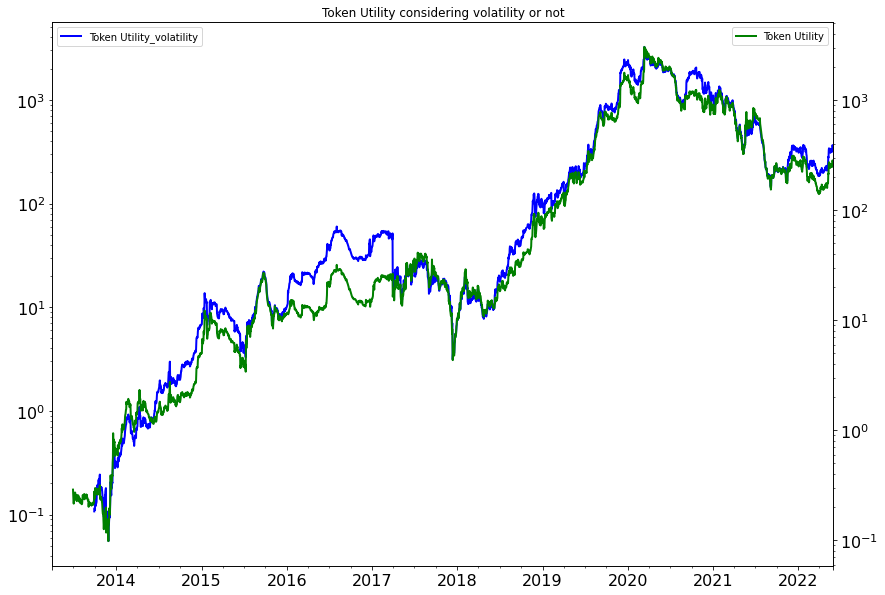

In [85]:
fig, ax1 =plt.subplots()
ax1 = df['Token Utility_volatility']['2013-04-01': ].plot(figsize=(14, 10), linewidth=2, fontsize=16, color='blue')
plt.legend(loc='upper left')
ax2=ax1.twinx()
ax2=df['Token Utility']['2013-04-01': ].plot(figsize=(14, 10), linewidth=2, fontsize=16,color='green')
ax1.set_yscale('log')
ax2.set_yscale('log')
plt.title('Token Utility considering volatility or not')
plt.legend(loc='best')
plt.savefig('/content/drive/My Drive/PU & Trading/Litecoin/ltc_TU_V.png')

In [86]:
df.head()

,AdrActCnt,AdrBal1in100KCnt,AdrBal1in100MCnt,AdrBal1in10BCnt,AdrBal1in10KCnt,AdrBal1in10MCnt,AdrBal1in1BCnt,AdrBal1in1KCnt,AdrBal1in1MCnt,AdrBalCnt,...,Five-year staking ratio,Ten-year staking ratio,Token Utility,PU Ratio,volatility30,volatility60,volatility90,volatility180,Token Utility_volatility,PU Ratio_volatility
2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
df.to_csv('/content/drive/My Drive/PU & Trading/Litecoin/LTC_2022_05_31.csv')